In [1]:
#Importe para manipulação de dados
import pandas as pd
import numpy as np

#Importe para visualização
import matplotlib.pyplot as plt

#Manipular datas e horários
from datetime import datetime

#Configura a posição dos marcadores de mês ao longo do eixo x em um gráfico que exibe datas
from matplotlib.dates import MonthLocator

In [3]:
#Carregando o arquivo
df_arq = "C:\\Users\\Sylvia\\Documents\\DRONE\\Dados\\Ecoveco_Fìsico-química_água_Mensal_Total.xlsx"
dados = pd.read_excel(df_arq)
print(dados.head())

    Ano  Mês  Dia  Local  Temperatura  Salinidade  Turbidez    pH
0  2023    1   23  Museu         26.0       35.41     31.34  8.06
1  2023    1   23  Museu         26.0       35.40     32.35  8.06
2  2023    1   23  Museu         25.9       35.42     34.65  8.06
3  2023    1   23  Museu         25.9       35.41     32.11  8.06
4  2023    1   23  Museu         26.0       35.41     34.79  8.06


In [4]:
#Concatenando as colunas de data em uma única coluna
dados["Data"] = pd.to_datetime(dados["Ano"].astype(str) + "-" + dados["Mês"].astype(str) + "-" + dados["Dia"].astype(str))
print(dados["Data"])

0     2023-01-23
1     2023-01-23
2     2023-01-23
3     2023-01-23
4     2023-01-23
         ...    
255   2024-04-25
256   2024-04-25
257   2024-04-25
258   2024-04-25
259   2024-04-25
Name: Data, Length: 260, dtype: datetime64[ns]


In [5]:
#Definindo as colunas de data e os dados que eu quero
data_column = "Data"  
Temperatura_column = "Temperatura"  
Salinidade_column = "Salinidade"  
Turbidez_column = "Turbidez"  

# Dividir os dados em DataFrames separados para cada local
dados_por_local = {}
locais = dados['Local'].unique()
for local in locais:
    dados_por_local[local] = dados[dados['Local'] == local]

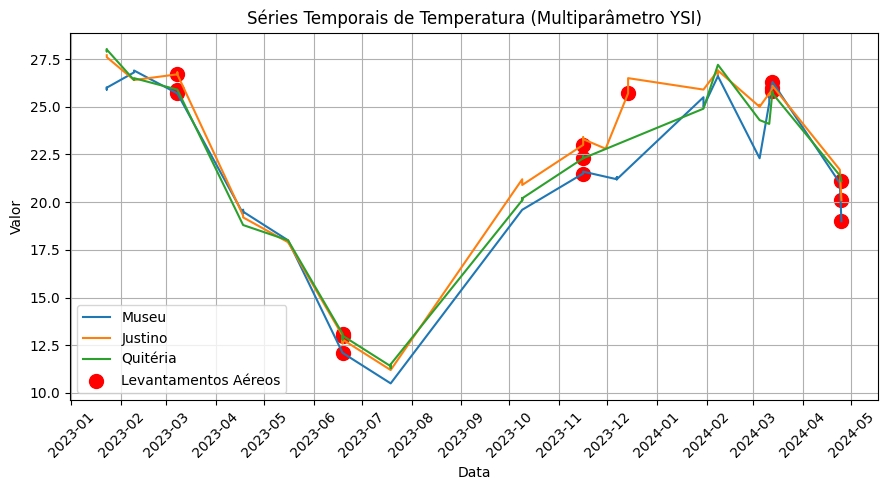

In [7]:
#Plotando a série temporal
plt.figure(figsize=(9, 5))

#Acessando os dados de um local específico
for local, df_local in dados_por_local.items():
    plt.plot(df_local[data_column], df_local[Temperatura_column], label=f"{local}")

#Pontos para destacar a datas do mês
datas_destaque = [pd.Timestamp("2023-03-08"), pd.Timestamp("2023-06-19"), pd.Timestamp("2023-11-16"), pd.Timestamp("2023-12-14"), pd.Timestamp("2024-03-13"), pd.Timestamp("2024-04-25")]

#Iterar sobre as datas de destaque
for ponto_destaque in datas_destaque:
    #Para cada data de destaque, encontrar os dados correspondentes para cada local
    for local, df_local in dados_por_local.items():
        #Verificar se a data está presente no DataFrame do local atual
        if ponto_destaque in df_local[data_column].values:
            #Se a data estiver presente, encontrar o dado correspondente
            temperatura_ponto_destaque = df_local.loc[df_local[data_column] == ponto_destaque, Temperatura_column].values[0]
            #Plotar o ponto de destaque
            plt.scatter(ponto_destaque, temperatura_ponto_destaque, color='red', s=100)

#legendas e título
plt.xlabel("Data")
plt.ylabel("Valor")
plt.title("Séries Temporais de Temperatura (Multiparâmetro YSI)")
plt.scatter([], [], color='red', s=100, label='Levantamentos Aéreos')#legenda apenas pontos de destaque
plt.grid(True) #Linhas de grade ao gráfico
plt.xticks(rotation=45)  # Ângulo de rotação dos marcadores de texto no eixo x
plt.gca().xaxis.set_major_locator(MonthLocator())  # Locator para mostrar os marcadores de mês em mês
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('Serie_Temporal_Temperatura_YSI.png')#Salvar o gráfico como uma imagem PNG
plt.show()

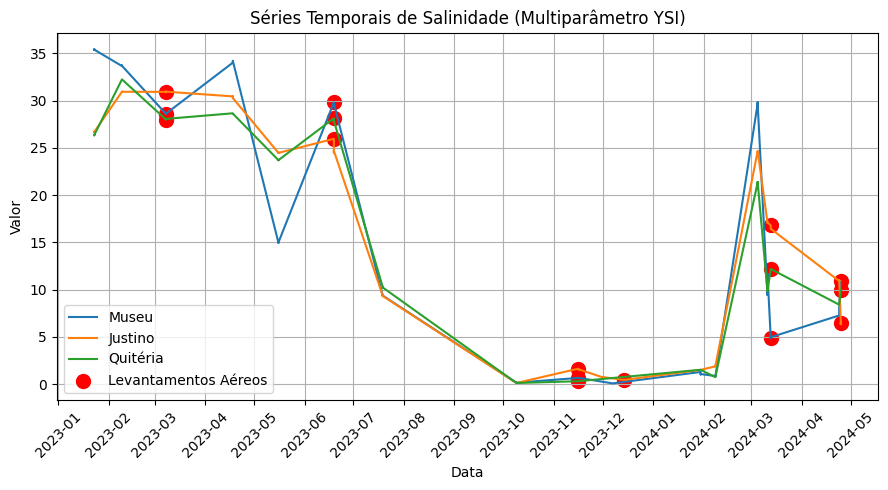

In [136]:
# Plotando a série temporal
plt.figure(figsize=(9, 5))

# Acessando os dados de um local específico
for local, df_local in dados_por_local.items():
    plt.plot(df_local[data_column], df_local[Salinidade_column], label=f"{local}")

# Adicionar pontos para destacar várias datas específicas do mês
datas_destaque = [pd.Timestamp("2023-03-08"), pd.Timestamp("2023-06-19"), pd.Timestamp("2023-11-16"), pd.Timestamp("2023-12-14"), pd.Timestamp("2024-03-13"), pd.Timestamp("2024-04-25")]  # Lista de datas de destaque

# Iterar sobre as datas de destaque
for ponto_destaque in datas_destaque:
    # Para cada data de destaque, encontrar as salinidade correspondentes para cada local
    for local, df_local in dados_por_local.items():
        # Verificar se a data está presente no DataFrame do local atual
        if ponto_destaque in df_local[data_column].values:
            # Se a data estiver presente, encontrar a temperatura correspondente
            salinidade_ponto_destaque = df_local.loc[df_local[data_column] == ponto_destaque, Salinidade_column].values[0]
            # Plotar o ponto de destaque
            plt.scatter(ponto_destaque, salinidade_ponto_destaque, color='red', s=100)

# Adicionando legendas e título
plt.xlabel("Data")
plt.ylabel("Valor")
plt.title("Séries Temporais de Salinidade (Multiparâmetro YSI)")
plt.scatter([], [], color='red', s=100, label='Levantamentos Aéreos')#legenda apenas pontos de destaque
plt.grid(True)  # Linhas de grade ao gráfico
plt.xticks(rotation=45)  # Ângulo de rotação dos marcadores de texto no eixo x
plt.gca().xaxis.set_major_locator(MonthLocator())  # Locator para mostrar os marcadores de mês em mês
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('Serie_Temporal_Salinidade_YSI.png')#Salvar o gráfico como uma imagem PNG
plt.show()

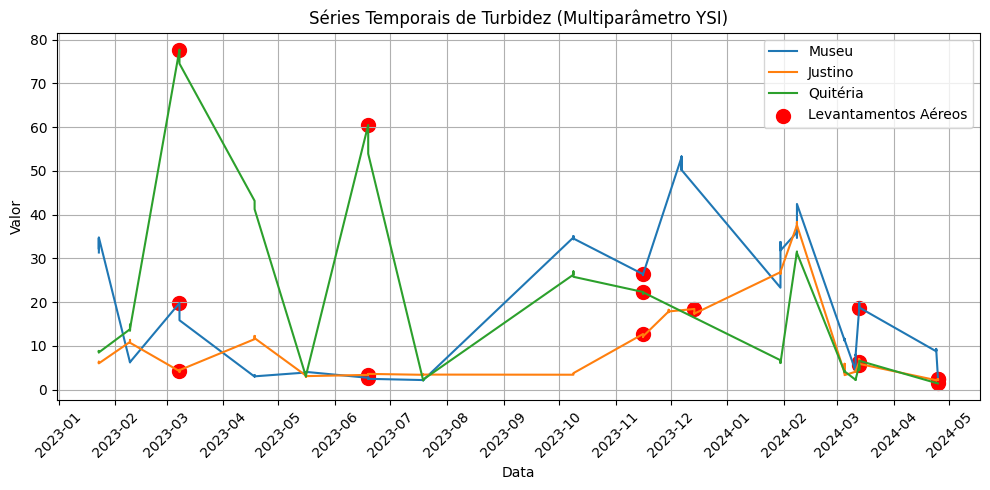

In [137]:
# Plotando a série temporal
plt.figure(figsize=(10, 5))

# Acessando os dados de um local específico
for local, df_local in dados_por_local.items():
    plt.plot(df_local[data_column], df_local[Turbidez_column], label=f"{local}")

# Adicionar pontos para destacar várias datas específicas do mês
datas_destaque = [pd.Timestamp("2023-03-08"), pd.Timestamp("2023-06-19"), pd.Timestamp("2023-11-16"), pd.Timestamp("2023-12-14"), pd.Timestamp("2024-03-13"), pd.Timestamp("2024-04-25")]  # Lista de datas de destaque

# Iterar sobre as datas de destaque
for ponto_destaque in datas_destaque:
    # Para cada data de destaque, encontrar as turbidez correspondentes para cada local
    for local, df_local in dados_por_local.items():
        # Verificar data no DataFrame do local
        if ponto_destaque in df_local[data_column].values:
            # Se a data estiver presente, encontrar a turbidez correspondente
            turbidez_ponto_destaque = df_local.loc[df_local[data_column] == ponto_destaque, Turbidez_column].values[0]
            # Plotar o ponto de destaque
            plt.scatter(ponto_destaque, turbidez_ponto_destaque, color='red', s=100)

# Adicionando legendas e título
plt.xlabel("Data")
plt.ylabel("Valor")
plt.title("Séries Temporais de Turbidez (Multiparâmetro YSI)")
plt.scatter([], [], color='red', s=100, label='Levantamentos Aéreos')#legenda apenas pontos de destaque
plt.grid(True)  # Linhas de grade ao gráfico
plt.xticks(rotation=45)  # Ângulo de rotação dos marcadores de texto no eixo x
plt.gca().xaxis.set_major_locator(MonthLocator())  # Locator para mostrar os marcadores de mês em mês
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('Serie_Temporal_Turbidez_YSI.png')#Salvar o gráfico como uma imagem PNG
plt.show()